In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import requests
import os
import matplotlib.pyplot as plt
import urllib.request
import seaborn as sns
from platform import platform
from glob import iglob
import math
#supress warnings
import warnings
warnings.filterwarnings('ignore')
from numpy import median
from scipy.stats import norm
import re

import plotly
from plotly.offline import iplot

import plotly.graph_objects as go
# from wordcloud import WordCloud


sns.set(style="darkgrid", font_scale=1.2)

In [2]:
#opening the file and reading it to dataframe
current_folder = globals()['_dh'][0]
file_path = current_folder + '/ecommerce_data.csv'
df = pd.read_csv(Path(file_path), error_bad_lines=False)
print(df.iloc[0])

uniq_id                                      cc51c3dd925d9d84e2fb28c7918dbbc3
crawl_timestamp                                     2019-08-11 05:49:46 +0000
product_id                                                            6937673
link                        https://www.myntra.com/tops/imara/imara-women-...
size                                                                       XL
variant_sku                                                        6937673_XL
brand                                                                   IMARA
care_instructions                                       Polyester | Dry-clean
dominant_material                                                   Polyester
title                                             IMARA Women Black Solid Top
actual_color                                                            Black
dominant_color                                                          Black
product_type                                                    

In [3]:
#print number of items
df.uniq_id.describe()

count                                15000
unique                               15000
top       cc51c3dd925d9d84e2fb28c7918dbbc3
freq                                     1
Name: uniq_id, dtype: object

In [4]:
#Brand Name analysis
df.brand.describe()

count     15000
unique      364
top       Anouk
freq       1725
Name: brand, dtype: object

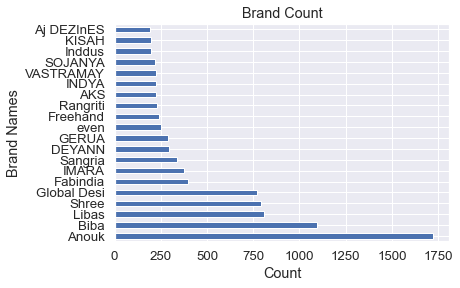

In [5]:
ax = df.brand.value_counts()[:20].plot(kind='barh', title='Brand Count')
ax.set_ylabel("Brand Names")
ax.set_xlabel("Count")
plt.show()

In [6]:
#Gender
df = df.rename(columns={'ideal_for': 'gender'})
df.gender.describe()

count     15000
unique        5
top       Women
freq       9205
Name: gender, dtype: object

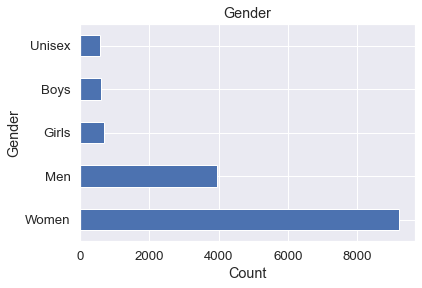

In [7]:
ax = df.gender.value_counts()[:20].plot(kind='barh', title='Gender')
ax.set_ylabel("Gender")
ax.set_xlabel("Count")
plt.show()

In [8]:
df.drop(df.loc[df['gender']=='Boys'].index, inplace=True)
df.drop(df.loc[df['gender']=='Girls'].index, inplace=True)
df.reset_index()

,index,uniq_id,crawl_timestamp,product_id,link,size,variant_sku,brand,care_instructions,dominant_material,...,size_fit,complete_the_look,type,variant_price,variant_compare_at_price,gender,is_in_stock,inventory,specifications,Unnamed: 25
0,0,cc51c3dd925d9d84e2fb28c7918dbbc3,2019-08-11 05:49:46 +0000,6937673,https://www.myntra.com/tops/imara/imara-women-...,XL,6937673_XL,IMARA,Polyester | Dry-clean,Polyester,...,"The model (height 5'8"") is wearing a size S",Improve your personal style with a brand new t...,Clothing/Women/Tops/IMARA/More by IMARA,959,1599,Women,Out of Stock,0,Transparency : Opaque | Sleeve Styling : Bell ...,NaN
1,1,c7e2fe388a93dae5c86b50dd8a5dbd7a,2019-07-03 01:04:34 +0000,7441182,https://www.myntra.com/kurtas/house-of-pataudi...,XL,7441182_XL,House of Pataudi,100% cottonMachine-wash,cotton,...,The model (height 6') is wearing a size M,"From House of Pataudi, this kurta is a great w...",Clothing/Men/Kurtas/House of Pataudi/More by H...,799,1999,Men,In Stock,Shape : Straight | Sleeve Styling : Regular Sl...,NaN,NaN
2,2,76949d78057a633aace6246045eefd66,2019-07-15 09:43:31 +0000,9245141,https://www.myntra.com/pillows/the-white-willo...,S,9245141_S,The White Willow,Polycotton | Only spot clean by hand with warm...,Cotton,...,Dimensions: 58.42 cm x 33.02 cm x 10.16 cm,The White Willow has been founded with the vis...,Home/Unisex/Pillows/The White Willow/More by T...,1399,2799,Unisex,In Stock,Number of Components : 1 | Material : Polycott...,NaN,NaN
3,3,5f83f6b51da1ef93bc0585577b6991e6,2019-07-15 14:11:14 +0000,1314889,https://www.myntra.com/dupatta/dupatta-bazaar/...,Onesize,1314889_Onesize,Dupatta Bazaar,Chiffon | Hand-wash,Chiffon,...,Length: 2.3 metres Width: 1.1 metres,Complement your ethnic ensemble with this dupa...,Clothing/Women/Dupatta/Dupatta Bazaar/More by ...,349,499,Women,In Stock,Pattern : Solid | Occasion : Daily | Border : ...,NaN,NaN
4,4,890bf4355c319a4211296b9d3176d11f,2019-06-01 08:17:28 +0000,7705322,https://www.myntra.com/kurta-sets/manyavar/man...,S,7705322_S,Manyavar,Top fabric: Silk Blend | Bottom fabric: Silk B...,Silk,...,The model (height 6') is wearing a size M,"From Manyavar, this kurta is a great way to sh...",Clothing/Men/Kurta Sets/Manyavar/More by Manyavar,2999,2999,Men,Out of Stock,Occasion : Festive | Number of Components : 2 ...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13703,14994,fa6d9090467edc3dc0706e6c66707bd1,2019-08-19 07:01:59 +0000,6554346,https://www.myntra.com/6554346,XL,6554346_XL,Freehand,Top fabric: Pure Cotton | Bottom fabric: Pure ...,Cotton,...,The model (height 6') is wearing a size M,This in-style kurta from Freehand is a must-ha...,Clothing/Men/Kurta Sets/Freehand/More by Freehand,919,2299,Men,Out of Stock,0,Occasion : Daily | Number of Components : 2 | ...,NaN
13704,14996,d42876ac4e79f4f8eafce06f42b83c4e,2019-08-19 15:55:34 +0000,5504617,https://www.myntra.com/kurtas/shakumbhari/shak...,XXL,5504617_XXL,Shakumbhari,Cotton | Machine-wash,Cotton,...,"The model (height 5'8"") is wearing a size S",Make a statement with this elegant kurta from ...,Clothing/Women/Kurtas/Shakumbhari/More by Shak...,627,1395,Women,Out of Stock,0,Shape : A-Line | Business Unit : Apparel | Sle...,https://www.myntra.com/shakumbhari
13705,14997,b0898407db4c65e025d0e9de6ac6732e,2019-08-14 05:37:01 +0000,4375262,https://www.myntra.com/4375262,M,4375262_M,Anouk,100% acrylic | Machine-wash,acrylic,...,"The model (height 5'8"") is wearing a size S",Embrace your casual side with this in-season s...,Clothing/Women/Sweaters/Anouk/More by Anouk,759,1899,Women,Out of Stock,0,Closure : Button | Occasion : Casual | Print o...,NaN
13706,14998,ec0aa336bb97ba406b7951bcc2aabdfc,2019-08-17 01:51:31 +0000,2012151,https://www.myntra.com/2012151,M,2012151_M,Anouk,Polyester | Machine-wash,Polyester,...,"The model (height 5'8"") is wearing a size S",Show off your elegant style with a brand new k...,Clothing/Women/Kurtas/Anouk/More by Anouk,599,1499,Women,Out 

In [9]:
#Categories
df = df.rename(columns={'type': 'category'})
df.category.describe()

count                                         13708
unique                                          763
top       Clothing/Women/Kurtas/Anouk/More by Anouk
freq                                            950
Name: category, dtype: object

In [10]:
# df.category = df.category.str.split('/').str[0]
def process_category(input_data):
    count = 0
    for i in range(3):
        def get_categories(ele):

            if type(ele) != str:
                return np.nan

            cat = ele.split('/')

            if i >= len(cat):
                return np.nan
            else:
                return cat[i]
        if i == 1:
            continue
        else:
            col_name = 'category_' + str(count)
            count += 1

        input_data[col_name] = input_data['category'].apply(get_categories)

        input_data.fillna({'category_name': 'Other'}, inplace = True)

process_category(df)
df.category.describe()

count                                         13708
unique                                          763
top       Clothing/Women/Kurtas/Anouk/More by Anouk
freq                                            950
Name: category, dtype: object

In [11]:
print(df.iloc[101])

uniq_id                                      fe3498b4f1ef41ba329521618d7a49e0
crawl_timestamp                                     2019-07-18 07:56:52 +0000
product_id                                                            7433892
link                        https://www.myntra.com/dupatta/varanga/varanga...
size                                                                  Onesize
variant_sku                                                   7433892_Onesize
brand                                                                 Varanga
care_instructions                                  Silk Blend |  Machine-wash
dominant_material                                                        Silk
title                                   Varanga Orange & Blue Printed Dupatta
actual_color                                                    Blue | Orange
dominant_color                                                         Orange
product_type                                                    

In [12]:
df.specifications.describe()
df.specifications.isna().sum()

4943

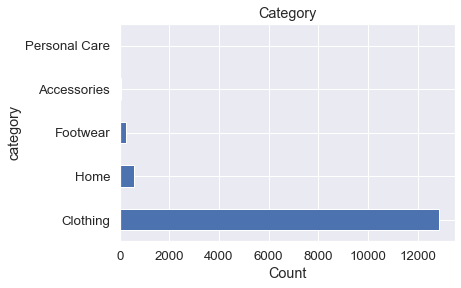

In [13]:
ax = df.category_0.value_counts()[:20].plot(kind='barh', title='Category')
ax.set_ylabel("category")
ax.set_xlabel("Count")
plt.show()


In [14]:
#Lets remove personal Care, Accessories, Home for now
df.drop(df.loc[df['category_0']=='Personal Care'].index, inplace=True)
df.drop(df.loc[df['category_0']=='Accessories'].index, inplace=True)
df.drop(df.loc[df['category_0']=='Home'].index, inplace=True)
df.reset_index()

,index,uniq_id,crawl_timestamp,product_id,link,size,variant_sku,brand,care_instructions,dominant_material,...,category,variant_price,variant_compare_at_price,gender,is_in_stock,inventory,specifications,Unnamed: 25,category_0,category_1
0,0,cc51c3dd925d9d84e2fb28c7918dbbc3,2019-08-11 05:49:46 +0000,6937673,https://www.myntra.com/tops/imara/imara-women-...,XL,6937673_XL,IMARA,Polyester | Dry-clean,Polyester,...,Clothing/Women/Tops/IMARA/More by IMARA,959,1599,Women,Out of Stock,0,Transparency : Opaque | Sleeve Styling : Bell ...,NaN,Clothing,Tops
1,1,c7e2fe388a93dae5c86b50dd8a5dbd7a,2019-07-03 01:04:34 +0000,7441182,https://www.myntra.com/kurtas/house-of-pataudi...,XL,7441182_XL,House of Pataudi,100% cottonMachine-wash,cotton,...,Clothing/Men/Kurtas/House of Pataudi/More by H...,799,1999,Men,In Stock,Shape : Straight | Sleeve Styling : Regular Sl...,NaN,NaN,Clothing,Kurtas
2,3,5f83f6b51da1ef93bc0585577b6991e6,2019-07-15 14:11:14 +0000,1314889,https://www.myntra.com/dupatta/dupatta-bazaar/...,Onesize,1314889_Onesize,Dupatta Bazaar,Chiffon | Hand-wash,Chiffon,...,Clothing/Women/Dupatta/Dupatta Bazaar/More by ...,349,499,Women,In Stock,Pattern : Solid | Occasion : Daily | Border : ...,NaN,NaN,Clothing,Dupatta
3,4,890bf4355c319a4211296b9d3176d11f,2019-06-01 08:17:28 +0000,7705322,https://www.myntra.com/kurta-sets/manyavar/man...,S,7705322_S,Manyavar,Top fabric: Silk Blend | Bottom fabric: Silk B...,Silk,...,Clothing/Men/Kurta Sets/Manyavar/More by Manyavar,2999,2999,Men,Out of Stock,Occasion : Festive | Number of Components : 2 ...,NaN,NaN,Clothing,Kurta Sets
4,5,6cb35dc135630e138f618b455014bf27,2019-07-28 13:03:52 +0000,2160958,https://www.myntra.com/kurta-sets/wintage/wint...,L,2160958_L,Wintage,Kurta fabric: linen | Bottom fabric: pure cott...,Linen,...,Clothing/Men/Kurta Sets/Wintage/More by Wintage,979,1399,Men,Out of Stock,0,Sleeve Styling : Regular Sleeves | Occasion : ...,NaN,Clothing,Kurta Sets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13090,14994,fa6d9090467edc3dc0706e6c66707bd1,2019-08-19 07:01:59 +0000,6554346,https://www.myntra.com/6554346,XL,6554346_XL,Freehand,Top fabric: Pure Cotton | Bottom fabric: Pure ...,Cotton,...,Clothing/Men/Kurta Sets/Freehand/More by Freehand,919,2299,Men,Out of Stock,0,Occasion : Daily | Number of Components : 2 | ...,NaN,Clothing,Kurta Sets
13091,14996,d42876ac4e79f4f8eafce06f42b83c4e,2019-08-19 15:55:34 +0000,5504617,https://www.myntra.com/kurtas/shakumbhari/shak...,XXL,5504617_XXL,Shakumbhari,Cotton | Machine-wash,Cotton,...,Clothing/Women/Kurtas/Shakumbhari/More by Shak...,627,1395,Women,Out of Stock,0,Shape : A-Line | Business Unit : Apparel | Sle...,https://www.myntra.com/shakumbhari,Clothing,Kurtas
13092,14997,b0898407db4c65e025d0e9de6ac6732e,2019-08-14 05:37:01 +0000,4375262,https://www.myntra.com/4375262,M,4375262_M,Anouk,100% acrylic | Machine-wash,acrylic,...,Clothing/Women/Sweaters/Anouk/More by Anouk,759,1899,Women,Out of Stock,0,Closure : Button | Occasion : Casual | Print o...,NaN,Clothing,Sweaters
13093,14998,ec0aa336bb97ba406b7951bcc2aabdfc,2019-08-17 01:51:31 +0000,2012151,https://www.myntra.com/2012151,M,2012151_M,Anouk,Polyester | Machine-wash,Polyester,...,Clothing/Women/Kurtas/Anouk/More by Anouk,599,1499,Women,Out of Stock,0,Shape : Straight | Sleeve Styling : Regular Sl...,NaN,Clothing,Kurtas


In [15]:
df1 = df.drop_duplicates(subset='product_id')
df1.product_id.apply(str).describe()

count       11208
unique      11208
top       6937673
freq            1
Name: product_id, dtype: object

In [16]:
df1 = df1.rename(columns={'Unnamed: 25': 'images_count'})
for index, row in df1.iterrows():
    no_str = row.images.count("|")
    df1.at[index, 'images_count'] = no_str
df1.iloc[0]

uniq_id                                      cc51c3dd925d9d84e2fb28c7918dbbc3
crawl_timestamp                                     2019-08-11 05:49:46 +0000
product_id                                                            6937673
link                        https://www.myntra.com/tops/imara/imara-women-...
size                                                                       XL
variant_sku                                                        6937673_XL
brand                                                                   IMARA
care_instructions                                       Polyester | Dry-clean
dominant_material                                                   Polyester
title                                             IMARA Women Black Solid Top
actual_color                                                            Black
dominant_color                                                          Black
product_type                                                    

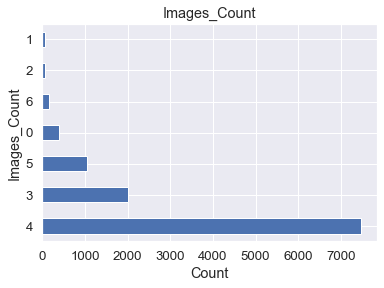

In [17]:
ax = df1.images_count.value_counts()[:20].plot(kind='barh', title='Images_Count')
ax.set_ylabel("Images_Count")
ax.set_xlabel("Count")
plt.show()

In [18]:
#Removing columns with mages less than 3
df1.drop(df1.loc[df1['images_count']==0].index, inplace=True)
df1.drop(df1.loc[df1['images_count']==1].index, inplace=True)
df1.reset_index()

,index,uniq_id,crawl_timestamp,product_id,link,size,variant_sku,brand,care_instructions,dominant_material,...,category,variant_price,variant_compare_at_price,gender,is_in_stock,inventory,specifications,images_count,category_0,category_1
0,0,cc51c3dd925d9d84e2fb28c7918dbbc3,2019-08-11 05:49:46 +0000,6937673,https://www.myntra.com/tops/imara/imara-women-...,XL,6937673_XL,IMARA,Polyester | Dry-clean,Polyester,...,Clothing/Women/Tops/IMARA/More by IMARA,959,1599,Women,Out of Stock,0,Transparency : Opaque | Sleeve Styling : Bell ...,4,Clothing,Tops
1,1,c7e2fe388a93dae5c86b50dd8a5dbd7a,2019-07-03 01:04:34 +0000,7441182,https://www.myntra.com/kurtas/house-of-pataudi...,XL,7441182_XL,House of Pataudi,100% cottonMachine-wash,cotton,...,Clothing/Men/Kurtas/House of Pataudi/More by H...,799,1999,Men,In Stock,Shape : Straight | Sleeve Styling : Regular Sl...,NaN,3,Clothing,Kurtas
2,3,5f83f6b51da1ef93bc0585577b6991e6,2019-07-15 14:11:14 +0000,1314889,https://www.myntra.com/dupatta/dupatta-bazaar/...,Onesize,1314889_Onesize,Dupatta Bazaar,Chiffon | Hand-wash,Chiffon,...,Clothing/Women/Dupatta/Dupatta Bazaar/More by ...,349,499,Women,In Stock,Pattern : Solid | Occasion : Daily | Border : ...,NaN,2,Clothing,Dupatta
3,5,6cb35dc135630e138f618b455014bf27,2019-07-28 13:03:52 +0000,2160958,https://www.myntra.com/kurta-sets/wintage/wint...,L,2160958_L,Wintage,Kurta fabric: linen | Bottom fabric: pure cott...,Linen,...,Clothing/Men/Kurta Sets/Wintage/More by Wintage,979,1399,Men,Out of Stock,0,Sleeve Styling : Regular Sleeves | Occasion : ...,4,Clothing,Kurta Sets
4,6,07cc95890eb0034fda8c7160a3a5be6d,2019-06-17 05:21:59 +0000,7766518,https://www.myntra.com/skirts/geroo-jaipur/ger...,34,7766518_34,Geroo Jaipur,First wash dry clean than after hand wash,NaN,...,Clothing/Women/Skirts/Geroo Jaipur/More by Ger...,1572,1850,Women,Out of Stock,Knit or Woven : Knitted and Woven | Transparen...,NaN,4,Clothing,Skirts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10755,14993,65cd8b64bac9149ae6376fc9f0291b85,2019-08-19 03:44:04 +0000,2366741,https://www.myntra.com/2366741,M,2366741_M,Shree,100% LivaHand-wash,Liva,...,Clothing/Women/Dresses/Shree/More by Shree,764,1699,Women,Out of Stock,0,Knit or Woven : Woven | Transparency : Opaque ...,4,Clothing,Dresses
10756,14994,fa6d9090467edc3dc0706e6c66707bd1,2019-08-19 07:01:59 +0000,6554346,https://www.myntra.com/6554346,XL,6554346_XL,Freehand,Top fabric: Pure Cotton | Bottom fabric: Pure ...,Cotton,...,Clothing/Men/Kurta Sets/Freehand/More by Freehand,919,2299,Men,Out of Stock,0,Occasion : Daily | Number of Components : 2 | ...,4,Clothing,Kurta Sets
10757,14996,d42876ac4e79f4f8eafce06f42b83c4e,2019-08-19 15:55:34 +0000,5504617,https://www.myntra.com/kurtas/shakumbhari/shak...,XXL,5504617_XXL,Shakumbhari,Cotton | Machine-wash,Cotton,...,Clothing/Women/Kurtas/Shakumbhari/More by Shak...,627,1395,Women,Out of Stock,0,Shape : A-Line | Business Unit : Apparel | Sle...,4,Clothing,Kurtas
10758,14997,b0898407db4c65e025d0e9de6ac6732e,2019-08-14 05:37:01 +0000,4375262,https://www.myntra.com/4375262,M,4375262_M,Anouk,100% acrylic | Machine-wash,acrylic,...,Clothing/Women/Sweaters/Anouk/More by Anouk,759,1899,Women,Out of Stock,0,Closure : Button | Occasion : Casual | Print o...,4,Clothing,Sweaters


In [19]:
#Splitting images to multiple rows
# for index, row in df1.iterrows():
#     images = [x.strip() for x in row['images'].split('|')]
#     print(images[0])
#     row['image_0'] = images[0]
#     row['image_1'] = images[1]
#     row['image_2'] = images[2]
# df1['Image_0','Image_1','Image_2'] = df1['images'].split("|", expand=True).str[0:3]
df1 = df1.join(df1['images'].str.split('\|', expand=True).add_prefix('image_'))

In [20]:
#removing duplicates
df1 = df1.drop_duplicates(subset='image_0')
df1 = df1.drop_duplicates(subset='image_1')
df1 = df1.drop_duplicates(subset='image_2')

In [21]:
df1['body'].describe()

count                                                 10759
unique                                                10750
top       Svanik Classic Short Kurta has a single Chest ...
freq                                                      3
Name: body, dtype: object

In [22]:
#Removing unwanted Columns
columns_to_remove = ['crawl_timestamp','product_id','link','size','variant_sku','body','size_fit','category','variant_price','is_in_stock','inventory', 'images_count']
df1.drop(columns_to_remove, inplace=True, axis=1, errors='ignore')
df1.reset_index()

,index,uniq_id,brand,care_instructions,dominant_material,title,actual_color,dominant_color,product_type,images,...,specifications,category_0,category_1,image_0,image_1,image_2,image_3,image_4,image_5,image_6
0,0,cc51c3dd925d9d84e2fb28c7918dbbc3,IMARA,Polyester | Dry-clean,Polyester,IMARA Women Black Solid Top,Black,Black,Top,http://assets.myntassets.com/v1/assets/images/...,...,Transparency : Opaque | Sleeve Styling : Bell ...,Clothing,Tops,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images...,http://assets.myntassets.com/v1/assets/images...,http://assets.myntassets.com/v1/assets/images...,http://assets.myntassets.com/v1/assets/images...,None,None
1,1,c7e2fe388a93dae5c86b50dd8a5dbd7a,House of Pataudi,100% cottonMachine-wash,cotton,House of Pataudi Men Black Printed Straight Kurta,Black,Black,Straight Kurta,http://assets.myntassets.com/v1/assets/images/...,...,NaN,Clothing,Kurtas,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images...,http://assets.myntassets.com/v1/assets/images...,http://assets.myntassets.com/v1/assets/images...,None,None,None
2,3,5f83f6b51da1ef93bc0585577b6991e6,Dupatta Bazaar,Chiffon | Hand-wash,Chiffon,Dupatta Bazaar Pink Dupatta,Pink,Pink,Dupatta,http://assets.myntassets.com/v1/assets/images/...,...,NaN,Clothing,Dupatta,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images...,http://assets.myntassets.com/v1/assets/images...,None,None,None,None
3,5,6cb35dc135630e138f618b455014bf27,Wintage,Kurta fabric: linen | Bottom fabric: pure cott...,Linen,Wintage Men Beige Solid Kurta with Pyjamas,Beige,Beige,Kurta with Pyjamas,http://assets.myntassets.com/v1/assets/images/...,...,Sleeve Styling : Regular Sleeves | Occasion : ...,Clothing,Kurta Sets,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images...,http://assets.myntassets.com/v1/assets/images...,http://assets.myntassets.com/v1/assets/images...,http://assets.myntassets.com/v1/assets/images...,None,None
4,6,07cc95890eb0034fda8c7160a3a5be6d,Geroo Jaipur,First wash dry clean than after hand wash,NaN,Geroo Women Green cotton hand block print skirt,Green,Green,NaN,http://assets.myntassets.com/v1/assets/images/...,...,NaN,Clothing,Skirts,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images...,http://assets.myntassets.com/v1/assets/images...,http://assets.myntassets.com/v1/assets/images...,http://assets.myntassets.com/v1/assets/images...,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10754,14993,65cd8b64bac9149ae6376fc9f0291b85,Shree,100% LivaHand-wash,Liva,Shree Women Grey & Red Floral Print Maxi Dress,Red | Grey,Grey,Maxi Dress,http://assets.myntassets.com/v1/assets/images/...,...,Knit or Woven : Woven | Transparency : Opaque ...,Clothing,Dresses,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images...,http://assets.myntassets.com/v1/assets/images...,http://assets.myntassets.com/v1/assets/images...,http://assets.myntassets.com/v1/assets/images...,None,None
10755,14994,fa6d9090467edc3dc0706e6c66707bd1,Freehand,Top fabric: Pure Cotton | Bottom fabric: Pure ...,Cotton,Freehand Men Red & White Self-Design Kurta wit...,Red | White,Red,Kurta with Pyjamas,http://assets.myntassets.com/v1/assets/images/...,...,Occasion : Daily | Number of Components : 2 | ...,Clothing,Kurta Sets,http://assets.myntassets.com/v1/assets/images/...,http://assets.myntassets.com/v1/assets/images...,http://assets.myntassets.com/v1/assets/images...,http://assets.myntassets.com/v1/assets/images...,http://assets.myntassets.com/v1/assets/images...,None,None
10756,14996,d42876ac4e79f4f8eafce06f42b83c4e,Shakumbhari,Cotton | Machine-wash,Cotton,Shakumbhari Women Pink Embroidered A-Line Kurta,Pink,Pink,A-Line Kurta,http://assets.myntassets.com/v1/assets/images/...,...,Shape : A-Line | Business Unit : App

In [22]:
columns_to_remove = ['image_3','image_4','image_5','image_6']
df1.drop(columns_to_remove, inplace=True, axis=1, errors='ignore')
df1.iloc[0]

uniq_id                                      cc51c3dd925d9d84e2fb28c7918dbbc3
crawl_timestamp                                     2019-08-11 05:49:46 +0000
product_id                                                            6937673
link                        https://www.myntra.com/tops/imara/imara-women-...
size                                                                       XL
variant_sku                                                        6937673_XL
brand                                                                   IMARA
care_instructions                                       Polyester | Dry-clean
dominant_material                                                   Polyester
title                                             IMARA Women Black Solid Top
actual_color                                                            Black
dominant_color                                                          Black
product_type                                                    

In [23]:
#Price checking
df1 = df1.rename(columns={'variant_compare_at_price': 'price'})
df1.price.describe()

count    10759.000000
mean      2362.869876
std       1819.747178
min        399.000000
25%       1399.000000
50%       1799.000000
75%       2699.000000
max      25500.000000
Name: price, dtype: float64

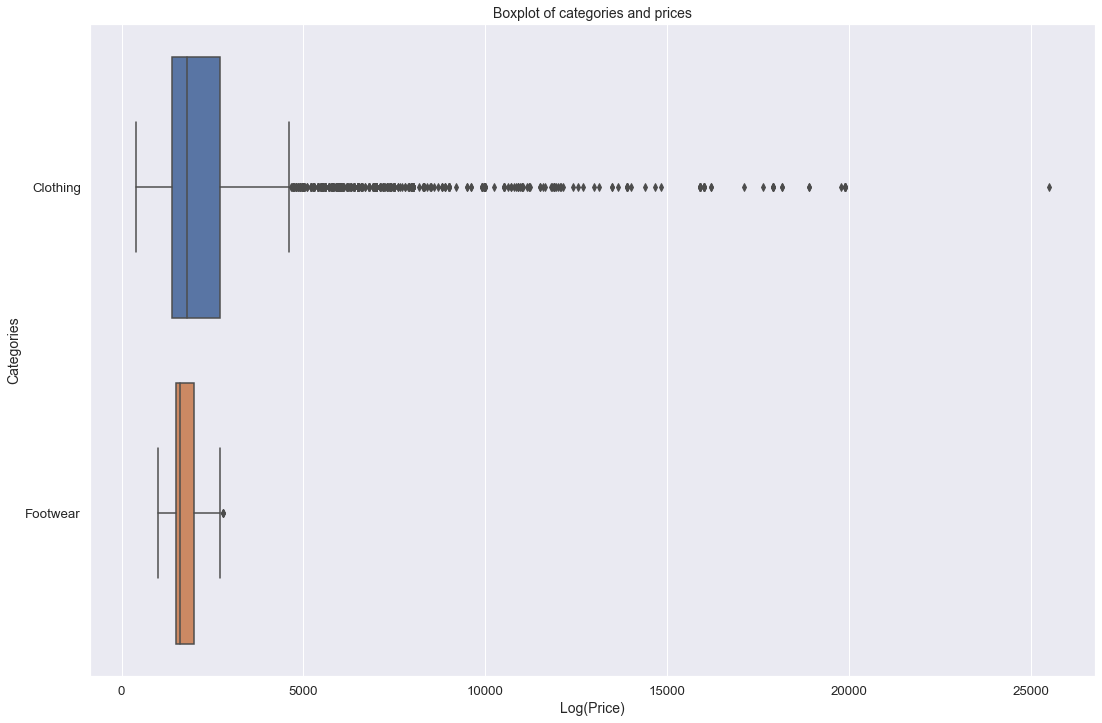

In [25]:
plt.figure(figsize=(18,12))
sns.boxplot(x = 'price', y = 'category_0', data = df1, orient = 'h')
plt.title('Boxplot of categories and prices', fontsize=14)
plt.xlabel('Log(Price)', fontsize=14)
plt.ylabel('Categories', fontsize=14)
plt.show()

In [24]:
df1.brand.value_counts()[0:11]

Anouk          1379
Biba            741
Libas           654
Shree           653
Global Desi     617
Fabindia        316
IMARA           313
Sangria         251
DEYANN          227
GERUA           226
even            206
Name: brand, dtype: int64

In [25]:
#luxurious brands
luxurious_brands = {}
expensive_brands = {}
cheap_brands = {}
def label_brand(brands, row):
   if row['brand'] in brands.keys() :
      return True
   else:
       return False

# data = df1.where(df1['price'] > 15000).sort_values(by=['price'], ascending=False)
mean_price = df1.groupby('brand')['price'].mean()
# lux_brands = df1.groupby('brand')['price'].mean() > 15000
for index, value in mean_price.items():
    if value > 15000:
        luxurious_brands[index] = value
    elif value > 5000:
        expensive_brands[index] = value
    else:
        cheap_brands[index] = value

df1['luxurious_brands'] = df1.apply(lambda row: label_brand(luxurious_brands, row), axis=1)
df1['expensive_brands'] = df1.apply(lambda row: label_brand(expensive_brands, row), axis=1)
df1['cheap_brands'] = df1.apply(lambda row: label_brand(cheap_brands, row), axis=1)

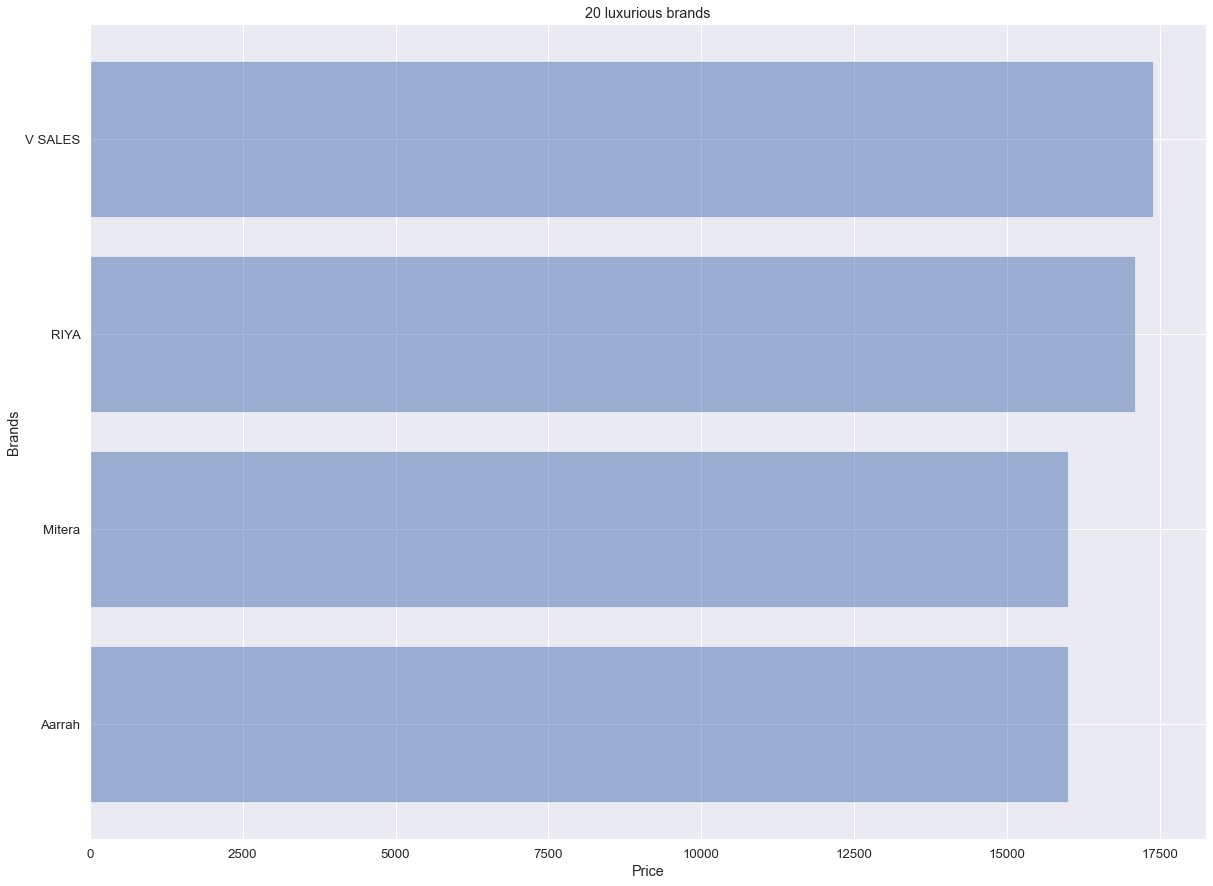

In [28]:
plt.figure(figsize=(20, 15))

plt.barh(range(0,len(luxurious_brands)), luxurious_brands.values(), align='center', alpha=0.5, color='b')

plt.yticks(range(0,len(luxurious_brands)), luxurious_brands.keys())
plt.xticks()
plt.title('20 luxurious brands')
plt.xlabel('Price')
plt.ylabel('Brands')
plt.show()

In [29]:
plt.figure(figsize=(20, 15))

plt.barh(range(0,len(expensive_brands)), expensive_brands['mean'], align='center', alpha=0.5, color='b')

plt.yticks(range(0,len(expensive_brands)), expensive_brands['brand'])
plt.xticks()
plt.title('20 expensive brands')
plt.xlabel('Price')
plt.ylabel('Brands')
plt.show()

KeyError: 'mean'

<Figure size 1440x1080 with 0 Axes>

In [53]:
print(df1.iloc[0])

uniq_id                               cc51c3dd925d9d84e2fb28c7918dbbc3
brand                                                            IMARA
care_instructions                                Polyester | Dry-clean
dominant_material                                            Polyester
title                                      IMARA Women Black Solid Top
actual_color                                                     Black
dominant_color                                                   Black
product_type                                                       Top
images               http://assets.myntassets.com/v1/assets/images/...
product_details      Black solid woven regular top,has a V-neck, th...
complete_the_look    Improve your personal style with a brand new t...
price                                                             1599
gender                                                           Women
specifications       Transparency : Opaque | Sleeve Styling : Bell ...
catego

(-0.5, 2999.5, 1999.5, -0.5)

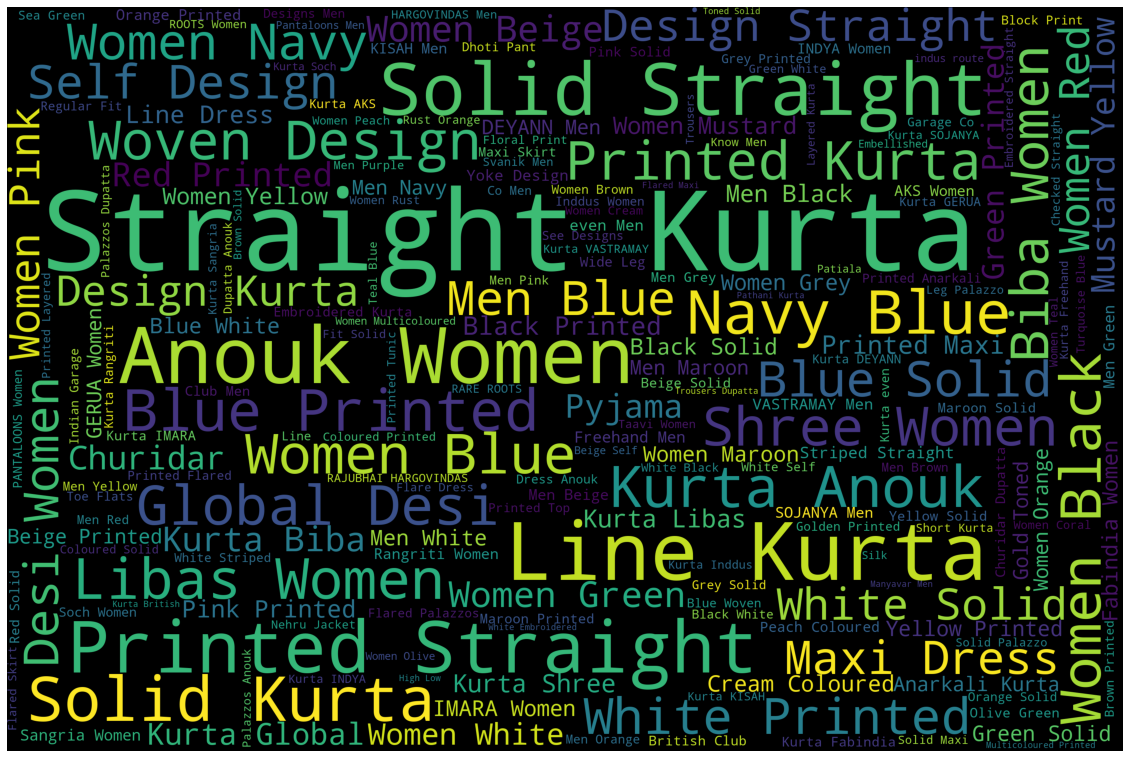

In [54]:
#Text Analysis
cloud = WordCloud(width=3000, height=2000).generate(' '.join(df1.title.astype(str)))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')

(-0.5, 2999.5, 1999.5, -0.5)

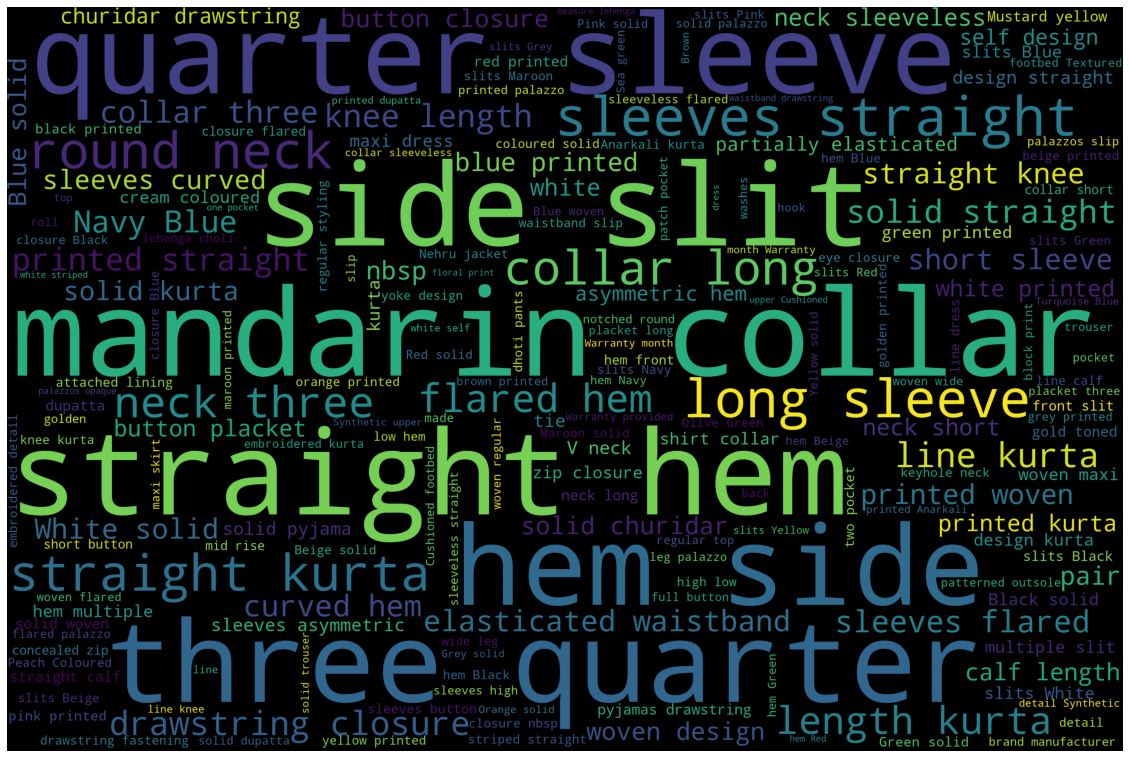

In [30]:
cloud = WordCloud(width=3000, height=2000).generate(' '.join(df1.product_details.astype(str)))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')

(-0.5, 2999.5, 1999.5, -0.5)

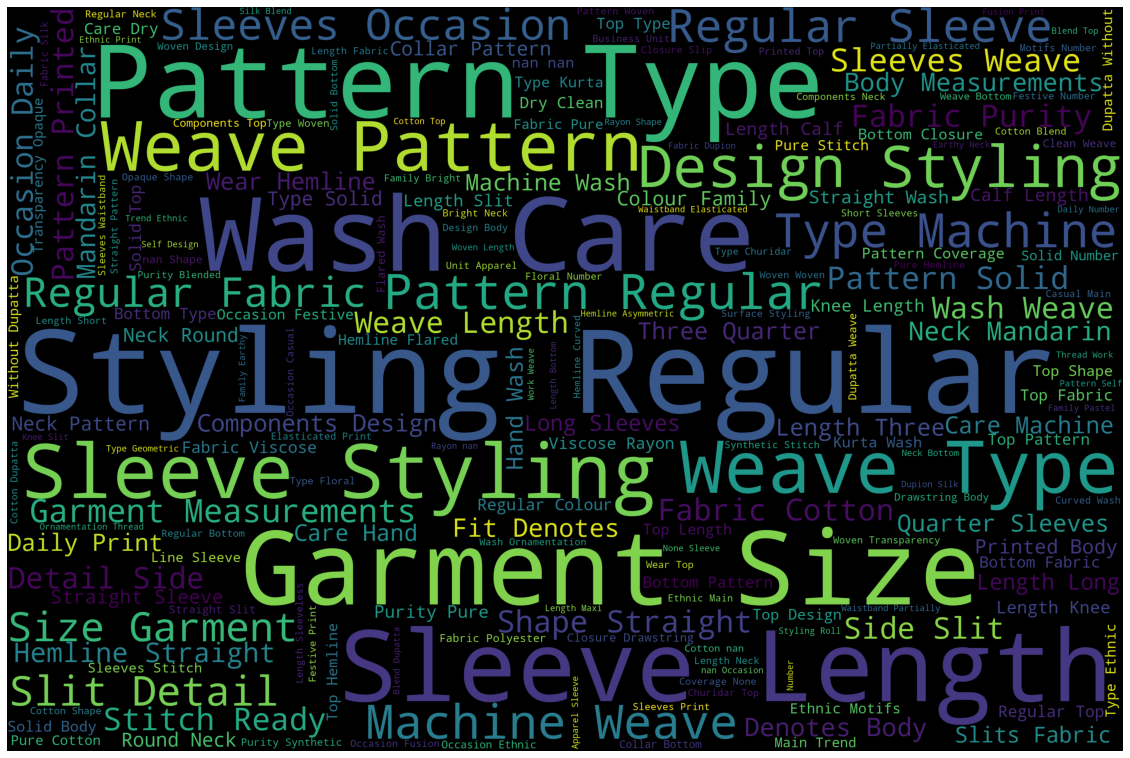

In [28]:
cloud = WordCloud(width=3000, height=2000).generate(' '.join(df1.specifications.astype(str)))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')

In [2]:
# df1.to_csv(current_folder + '/updated_ecommerce_data_feature_importance.csv')
#opening the file and reading it to dataframe
current_folder = globals()['_dh'][0]
# file_path = current_folder + '/updated_ecommerce_data.csv'
file_path = current_folder + '/updated_ecommerce_data_feature_importance.csv'
df1 = pd.read_csv(Path(file_path), error_bad_lines=False)
print(df1.iloc[0])

Unnamed: 0                                                           0
uniq_id                               cc51c3dd925d9d84e2fb28c7918dbbc3
crawl_timestamp                              2019-08-11 05:49:46 +0000
product_id                                                     6937673
link                 https://www.myntra.com/tops/imara/imara-women-...
size                                                                XL
variant_sku                                                 6937673_XL
brand                                                            IMARA
care_instructions                                Polyester | Dry-clean
dominant_material                                            Polyester
title                                      IMARA Women Black Solid Top
actual_color                                                     Black
dominant_color                                                   Black
product_type                                                       Top
images

In [4]:
def process_care_inst(input_data):
    count = 0
    for i in range(3):
        def get_categories(ele):

            if type(ele) != str:
                return np.nan

            cat = ele.split('|')

            if i >= len(cat):
                return np.nan
            else:
                return cat[i]

        col_name = 'care_instruction_' + str(count)
        count += 1

        input_data[col_name] = input_data['care_instructions'].apply(get_categories)

        input_data.fillna({'category_name': 'Other'}, inplace = True)

process_care_inst(df1)
df1.iloc[0]

Unnamed: 0                                                            0
uniq_id                                cc51c3dd925d9d84e2fb28c7918dbbc3
crawl_timestamp                               2019-08-11 05:49:46 +0000
product_id                                                      6937673
link                  https://www.myntra.com/tops/imara/imara-women-...
size                                                                 XL
variant_sku                                                  6937673_XL
brand                                                             IMARA
care_instructions                                 Polyester | Dry-clean
dominant_material                                             Polyester
title                                       IMARA Women Black Solid Top
actual_color                                                      Black
dominant_color                                                    Black
product_type                                                    

In [5]:
columns_to_remove = ['care_instruction_2','is_in_stock','Unnamed: 0','link', 'crawl_timestamp', 'inventory', 'images_count','variant_price','size_fit']
df1.drop(columns_to_remove, inplace=True, axis=1, errors='ignore')
df1.iloc[0]

uniq_id                                cc51c3dd925d9d84e2fb28c7918dbbc3
product_id                                                      6937673
size                                                                 XL
variant_sku                                                  6937673_XL
brand                                                             IMARA
care_instructions                                 Polyester | Dry-clean
dominant_material                                             Polyester
title                                       IMARA Women Black Solid Top
actual_color                                                      Black
dominant_color                                                    Black
product_type                                                        Top
images                http://assets.myntassets.com/v1/assets/images/...
body                  Black solid woven regular top,has a V-neck, th...
product_details       Black solid woven regular top,has a V-neck

In [131]:
# Uncomment below code to perform download
# image_folder = current_folder + "/Images/"
# for index, row in df1.iterrows():
#         for i in range(3):
#             try:
#                 image_name = image_folder + row['uniq_id'] + '_' + str(i) + '.' + row['image_' + str(i)].split('.')[-1]
#                 image_name = image_name.strip()
#                 if os.path.isfile(image_name):
#                     continue
#                 # with open(image_name, 'wb') as handler:
#                 #     # handler.write(img_data)
#                 #     handler.write(urllib.urlopen(row['image_' + str(i)]).read())
#                 urllib.request.urlretrieve(row['image_' + str(i)], image_name)
#             except Exception as exp:
#                 print(exp.req.fullpath)
#



AttributeError: 'HTTPResponse' object has no attribute 'req'

In [13]:
df_women = df1.drop(df1.loc[df1['gender']=='Men'].index)
df_men = df1.drop(df1.loc[df1['gender']=='Women'].index)
df_footwear = df1.drop(df1.loc[df1['category_0']=='Clothing'].index)
df_clothing = df1.drop(df1.loc[df1['category_0']=='Footwear'].index)

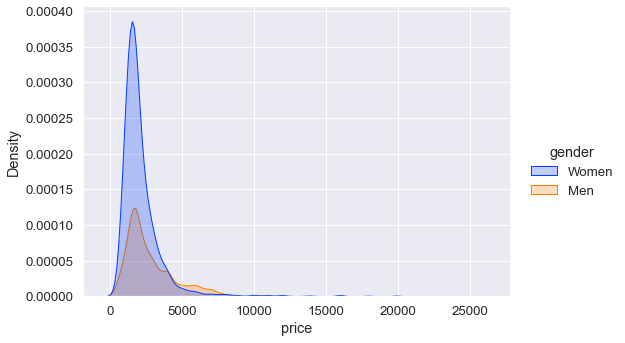

In [67]:
#Histogram of price count
# sns.displot(data=df1, x="price",kind="hist", aspect=1.4, label="Price plot for All Categories")
# sns.displot(data=df_men, x="price",kind="hist", aspect=1.4, label="Price plot for Men")
# sns.displot(data=df_women, x="price",kind="hist", aspect=1.4, label="Price plot for Women")
sns.displot(data=df1, x="price",hue='gender',kind="kde",fill=True,palette=sns.color_palette('bright')[:2], aspect=1.5,height=5, label="Price plot for Men")



In [68]:
def GetAllImagesInPath(path):
    jpg_path = os.path.join(path, '**/*.jpg')
    jpeg_path = os.path.join(path, '**/*.jpeg')
    bmp_path = os.path.join(path, '**/*.bmp')
    png_path = os.path.join(path, '**/*.png')

    image_paths = []

    image_paths.extend(iglob(jpg_path, recursive=True))
    image_paths.extend(iglob(jpeg_path, recursive=True))
    image_paths.extend(iglob(bmp_path, recursive=True))
    image_paths.extend(iglob(png_path, recursive=True))

    # windows is case insensitive so we don't need to add this
    if not platform().startswith('Windows'):
        jpg_path = os.path.join(path, '**/*.JPG')
        jpeg_path = os.path.join(path, '**/*.JPEG')
        bmp_path = os.path.join(path, '**/*.BMP')
        png_path = os.path.join(path, '**/*.PNG')

        image_paths.extend(iglob(jpg_path, recursive=True))
        image_paths.extend(iglob(jpeg_path, recursive=True))
        image_paths.extend(iglob(bmp_path, recursive=True))
        image_paths.extend(iglob(png_path, recursive=True))

    return image_paths

In [4]:
#Removing rows without images
i = 0
image_paths = GetAllImagesInPath(current_folder + "/Images/")
list_full = df1['uniq_id'].to_list()
partial_list = []
for image_path in image_paths:
    # res = remove_duplicate_images(image_path)
    # if res:
    uniq = image_path.split('/')[-1].split('_')[0]
    partial_list.append(uniq)
    # str = df.loc [df['uniq_id'] == uniq]
    # print(str)
    # new_df.append(str, ignore_index=True)
to_be_removed_list = list(set(list_full) - set(partial_list))
new_df_ecom = df1[~df1['uniq_id'].isin(to_be_removed_list)]
new_df_test = df1[df1['uniq_id'].isin(to_be_removed_list)]

NameError: name 'GetAllImagesInPath' is not defined

In [70]:
#Total indices
print('Total indices in new_df {}'.format(len(new_df_ecom.index)))
print('Total indices in df1 {}'.format(len(df1.index)))

Total indices in new_df 10759
Total indices in df1 10759


In [71]:
#Writing to csv
new_df_ecom.to_csv(current_folder + '/updated_ecommerce_data.csv')
df_men = new_df_ecom.drop(new_df_ecom.loc[new_df_ecom['gender']=='Women'].index)
df_women = new_df_ecom.drop(new_df_ecom.loc[new_df_ecom['gender']=='Men'].index)
df_men.to_csv(current_folder + '/updated_ecommerce_data_men.csv')
df_women.to_csv(current_folder + '/updated_ecommerce_data_women.csv')

In [14]:
total_records = len(df1)
records_foot = len(df_footwear)
records_cloth = len(df_clothing)
print(records_foot)
print(records_cloth)
perc_60 = math.ceil(.6 * total_records)
perc_20 = math.ceil(.2 * total_records)
perc_60_foot = math.ceil(.6 * records_foot)
perc_20_foot = math.ceil(.2 * records_foot)
perc_60_cloth = math.ceil(.6 * records_cloth)
perc_20_cloth = math.ceil(.2 * records_cloth)

207
10552


In [15]:
# foot_train_indices = list(range(0, perc_60_foot))
# foot_validation_indices = list(range(perc_60_foot + 1, perc_20_foot + perc_60_foot))
# foot_test_indices = list(range(perc_20_foot + perc_60_foot + 1, records_foot))
# # print(foot_train_indices)

cloth_train_indices = list(range(0, perc_60_cloth))
cloth_validation_indices = list(range(perc_60_cloth + 1, perc_20_cloth + perc_60_cloth))
cloth_test_indices = list(range(perc_20_cloth + perc_60_cloth + 1, records_cloth))

# df1 = df1.reset_index(drop=True)
# df_footwear = df_footwear.reset_index(drop=True)
# df_train_foot = df_footwear.iloc[foot_train_indices,:]
# df_validation_foot = df_footwear.iloc[foot_validation_indices,:]
# df_test_foot = df_footwear.iloc[foot_test_indices,:]

df_clothing = df_clothing.reset_index(drop=True)
df_train_cloth = df_clothing.iloc[cloth_train_indices,:]
df_validation_cloth = df_clothing.iloc[cloth_validation_indices,:]
df_test_cloth = df_clothing.iloc[cloth_test_indices,:]

# df_train = pd.concat([df_train_foot, df_train_cloth])
# df_validation = pd.concat([df_validation_foot,df_validation_cloth])
# df_test = pd.concat([df_test_foot, df_test_cloth])

# df_train = df_train.sample(frac=1).reset_index(drop=True)
# df_validation = df_validation.sample(frac=1).reset_index(drop=True)
# df_test = df_test.sample(frac=1).reset_index(drop=True)

df_train = df_train_cloth.sample(frac=1).reset_index(drop=True)
df_validation = df_validation_cloth.sample(frac=1).reset_index(drop=True)
df_test = df_test_cloth.sample(frac=1).reset_index(drop=True)

df_train.to_csv(current_folder + '/train_records.csv')
df_validation.to_csv(current_folder + '/validation_records.csv')
df_test.to_csv(current_folder + '/test_records.csv')

In [16]:
print(validation_indices)

NameError: name 'validation_indices' is not defined